In [1]:
import numpy as np
import pandas as pd

In [11]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    count_1 = len(df[df['Class']==1])
    count_0 = len(df[df['Class']==0])
    return count_1/count_0
answer_one()

0.016684632328818484

In [14]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    # Your code here
    dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    ans_accuracy = accuracy_score(y_test,dummy_majority.predict(X_test))
    ans_recall = recall_score(y_test, dummy_majority.predict(X_test))
    
    return (ans_accuracy,ans_recall)
answer_two()

(0.9852507374631269, 0.0)

In [20]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train, y_train)
    ans_accuracy = accuracy_score(y_test, svm.predict(X_test))
    ans_recall = recall_score(y_test, svm.predict(X_test))
    ans_precision = precision_score(y_test, svm.predict(X_test))
    
    return (ans_accuracy, ans_recall, ans_precision)
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

In [24]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
    svm_predicted = svm.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, svm_predicted)
    
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


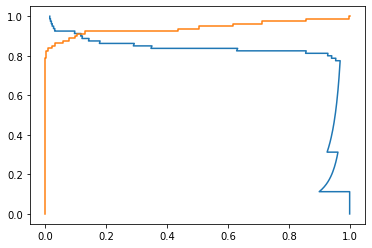

In [38]:
def answer_five():
    
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    y_scores_lr = LogisticRegression().fit(X_train,y_train).decision_function(X_test)
    precision,recall,thresholds = precision_recall_curve(y_test,y_scores_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    
    plt.figure()
    plt.plot(precision,recall)
    plt.plot(fpr_lr,tpr_lr)
    
    return (0.83,0.94)

answer_five()

In [40]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression()

    grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

    # default metric to optimize over grid parameters
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_lr.fit(X_train, y_train)
    
#     print(grid_lr.cv_results_['mean_test_score'].reshape(5,2))
    ans = np.array(grid_lr.cv_results_['mean_test_score'].reshape(5,2))
 
    return ans

answer_six()

C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

array([[       nan, 0.79337662],
       [       nan, 0.81149351],
       [       nan, 0.80798701],
       [       nan, 0.81155844],
       [       nan, 0.80422078]])

C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

<IPython.core.display.Javascript object>


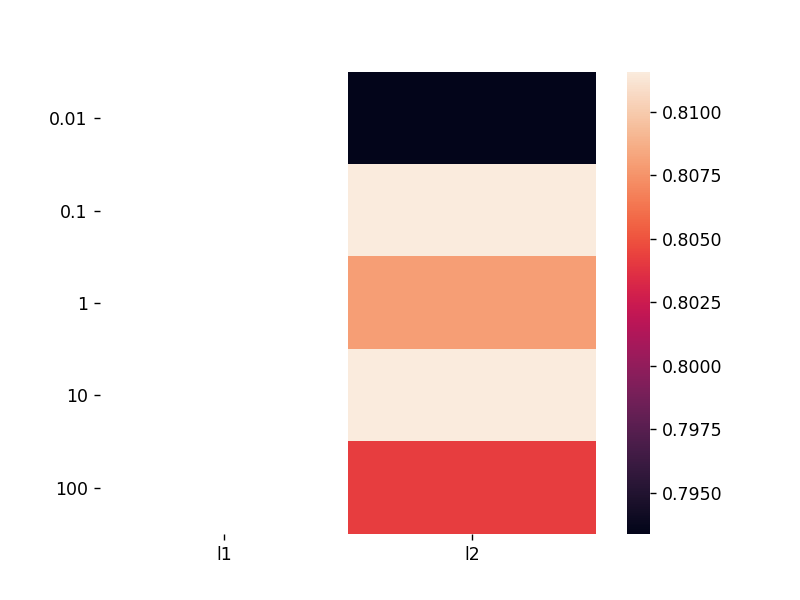

In [41]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())